In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_data = pd.read_csv('salary_data_states.csv')

In [3]:
avg_salaries = salary_data.groupby('JOB_TITLE_SUBGROUP').mean()['PAID_WAGE_PER_YEAR']

In [4]:
print (avg_salaries)

JOB_TITLE_SUBGROUP
assistant professor       94876.713707
attorney                 146413.596714
business analyst          71300.079566
data analyst              70030.078688
data scientist           108021.038248
management consultant    108251.334662
software engineer         92505.303013
teacher                   46039.985507
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [5]:

avg_salaries = avg_salaries.fillna(0)

In [6]:
data_analyst_salary = avg_salaries.filter(like='data analyst')
data_scientist_salary = avg_salaries.filter(like='data scientist')
business_analyst_salary = avg_salaries.filter(like='business analyst')
software_engineer_salary = avg_salaries.filter(like='software engineer')

In [7]:
print(data_analyst_salary,data_scientist_salary,business_analyst_salary, software_engineer_salary)

JOB_TITLE_SUBGROUP
data analyst    70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64 JOB_TITLE_SUBGROUP
data scientist    108021.038248
Name: PAID_WAGE_PER_YEAR, dtype: float64 JOB_TITLE_SUBGROUP
business analyst    71300.079566
Name: PAID_WAGE_PER_YEAR, dtype: float64 JOB_TITLE_SUBGROUP
software engineer    92505.303013
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [8]:
salaries = [data_analyst_salary, data_scientist_salary, business_analyst_salary, software_engineer_salary]
jobs = ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer']

In [9]:
data_analyst_salary = data_analyst_salary.sort_values(ascending=False)
data_scientist_salary = data_scientist_salary.sort_values(ascending=False)
business_analyst_salary = business_analyst_salary.sort_values(ascending=False)
software_engineer_salary = software_engineer_salary.sort_values(ascending=False)

In [10]:
print("Average Salary for Data Analysts:")
print(data_analyst_salary)
print("\nAverage Salary for Data Scientists:")
print(data_scientist_salary)
print("\nAverage Salary for Business Analyst:")
print(business_analyst_salary)
print("\nAverage Salary for Software Enigneer:")
print(software_engineer_salary)

Average Salary for Data Analysts:
JOB_TITLE_SUBGROUP
data analyst    70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64

Average Salary for Data Scientists:
JOB_TITLE_SUBGROUP
data scientist    108021.038248
Name: PAID_WAGE_PER_YEAR, dtype: float64

Average Salary for Business Analyst:
JOB_TITLE_SUBGROUP
business analyst    71300.079566
Name: PAID_WAGE_PER_YEAR, dtype: float64

Average Salary for Software Enigneer:
JOB_TITLE_SUBGROUP
software engineer    92505.303013
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [11]:
salaries = pd.concat([data_analyst_salary, data_scientist_salary, business_analyst_salary, software_engineer_salary], axis=1)

In [12]:
jobs = ['Data Analyst', 'Data Scientist', 'Business Analyst']
salaries = [data_analyst_salary, data_scientist_salary, business_analyst_salary]

In [13]:
avg_salaries = pd.DataFrame({
    'Job Title': ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer'],
    'Salary': [70030, 108021, 71300, 92505]
})

In [14]:
data_analyst_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Data Analyst')]
data_scientist_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Data Scientist')]
business_analyst_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Business Analyst')]
software_engineer_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Software Engineer')]

In [15]:
salary_table = pd.concat([data_analyst_salary, data_scientist_salary, business_analyst_salary, software_engineer_salary])
salary_table.reset_index(drop=True, inplace=True)

In [16]:
print(salary_table)
salary_table.head()

           Job Title  Salary
0       Data Analyst   70030
1     Data Scientist  108021
2   Business Analyst   71300
3  Software Engineer   92505


,Job Title,Salary
0,Data Analyst,70030
1,Data Scientist,108021
2,Business Analyst,71300
3,Software Engineer,92505


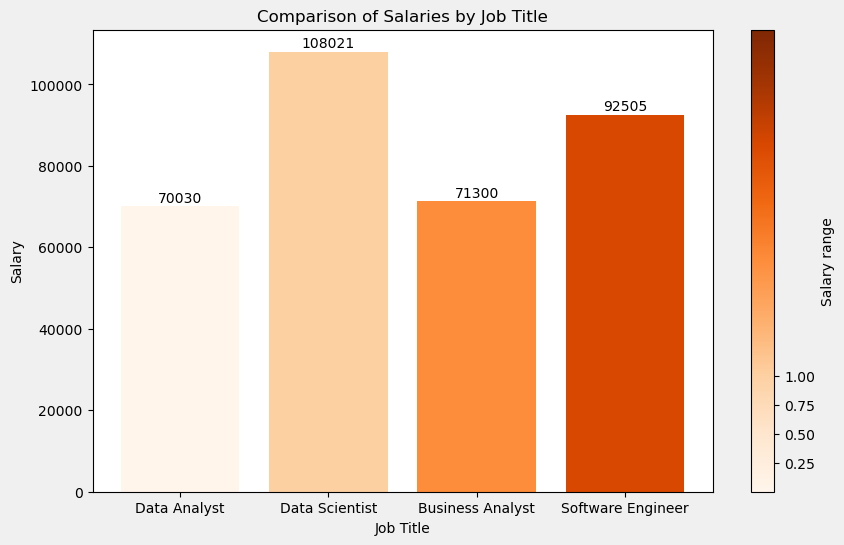

In [17]:
labels = ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer']
values = [data_analyst_salary['Salary'].values[0],
          data_scientist_salary['Salary'].values[0],
          business_analyst_salary['Salary'].values[0],
          software_engineer_salary['Salary'].values[0]]

color_range = ['#0092C7', '#00BFF3', '#90E0EF', '#FFC300', '#FF5733']
color_scale = np.linspace(0, 1, len(values) + 1)


fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))


for i, (label, value) in enumerate(zip(labels, values)):
    color = plt.cm.colors.to_hex(plt.cm.Oranges(color_scale[i]))
    ax.bar(label, value, color=color)

    
for i, v in enumerate(values):
    ax.text(i, v + 1000, str(v), ha='center', fontsize=10)


ax.set_title('Comparison of Salaries by Job Title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary')


sm = plt.cm.ScalarMappable(cmap=plt.cm.Oranges, norm=plt.Normalize(vmin=0, vmax=len(values)))
sm.set_array([])
fig.colorbar(sm, ticks=color_scale[1:], label='Salary range')

plt.show()


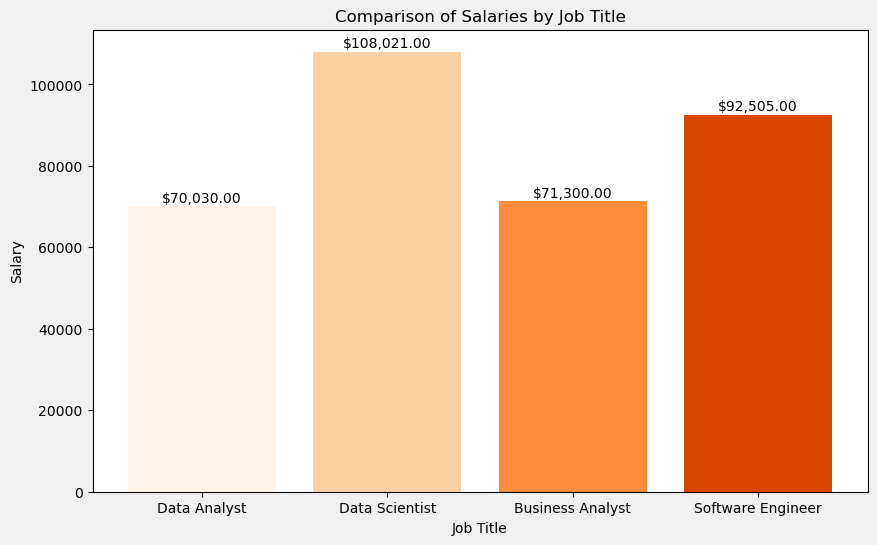

In [21]:
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') 


fig, ax = plt.subplots(figsize=(10, 6), facecolor=(.94, .94, .94))

for i, (label, value) in enumerate(zip(labels, values)):
    color = plt.cm.colors.to_hex(plt.cm.Oranges(color_scale[i]))
    ax.bar(label, value, color=color)

for i, v in enumerate(values):
    salary_str = locale.currency(v, grouping=True)  # format the salary as currency
    ax.text(i, v + 1000, salary_str, ha='center', fontsize=10)

ax.set_title('Comparison of Salaries by Job Title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary')

plt.show()

In [84]:
salaries = [70030, 71300, 92505, 108021]
max_salary = max(salaries)
min_salary = min(salaries)
avg_salary = sum(salaries) / len(salaries)

print("The highest salary is:", max_salary)
print("The lowest salary is:", min_salary)
print("The average salary is:", avg_salary)

The highest salary is: 108021
The lowest salary is: 70030
The average salary is: 85464.0


In [85]:
salaries = pd.DataFrame({'Name': ['Data Analyst', 'Business Analyst', 'Software Enigneer', 'Data Scientist'],
                         'Salary': [70030, 71300, 92505, 108021]})

def highlight_max_min(s):
    '''
    highlight the maximum and minimum in a Series yellow.
    '''
    max_val = s.max()
    min_val = s.min()
    is_max = s == max_val
    is_min = s == min_val
    return ['background-color: green' if x else 'background-color: red' if y else '' for x,y in zip(is_max, is_min)]

highlighted_salaries = salaries.style.apply(highlight_max_min, subset=['Salary'])

table_styles = [{'selector': 'table', 'props': [('width', '500px')]}]
highlighted_salaries.set_table_styles(table_styles)

,Name,Salary
0,Data Analyst,70030
1,Business Analyst,71300
2,Software Enigneer,92505
3,Data Scientist,108021


In [86]:
salaries = {'Business Analyst': 71300, 
            'Data Analyst': 70030, 
            'Data Scientist': 108021, 
            'Software Engineer': 92505}

In [87]:
labels = list(salaries.keys())
values = list(salaries.values())

In [88]:
fig = plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

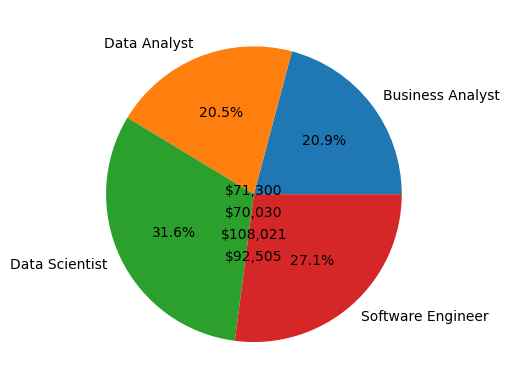

In [89]:
salaries = [71300, 70030, 108021, 92505]
positions = ['Business Analyst', 'Data Analyst', 'Data Scientist', 'Software Engineer']

fig, ax = plt.subplots()
ax.pie(salaries, labels=positions, autopct='%1.1f%%')

for i, salary in enumerate(salaries):
    ax.text(0, 0-(i*0.15), f"${salary:,}", ha='center')

plt.show()

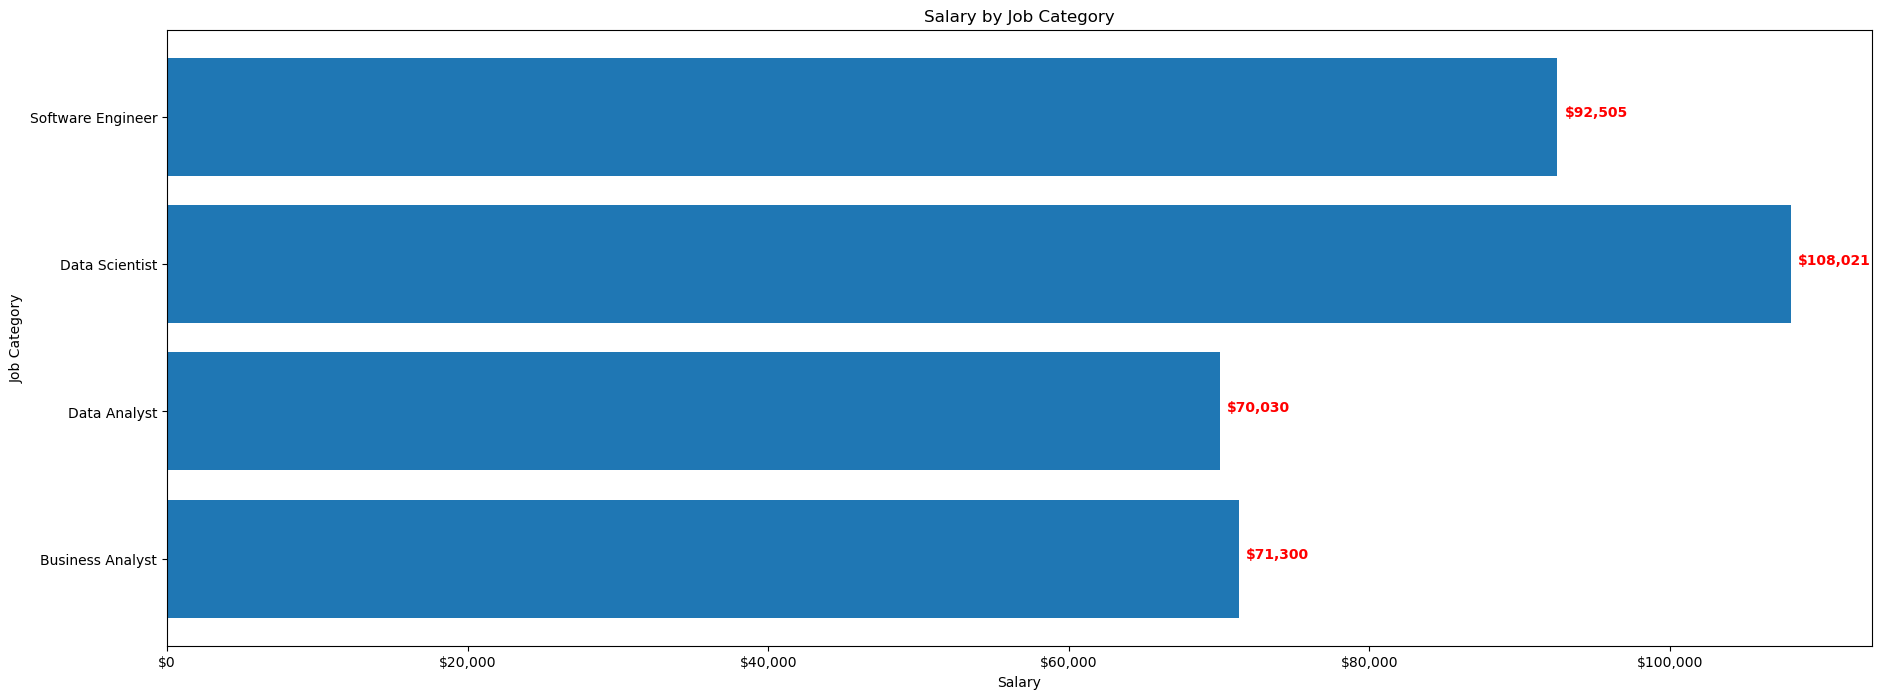

In [90]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

salaries = [71300, 70030, 108021, 92505]
jobs = ['Business Analyst', 'Data Analyst', 'Data Scientist', 'Software Engineer']

fig, ax = plt.subplots(figsize=(22, 8))

ax.barh(jobs, salaries)

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

for i, v in enumerate(salaries):
    ax.text(v + 500, i, f'${v:,.0f}', color='red', fontweight='bold')

ax.set_xlabel('Salary')
ax.set_ylabel('Job Category')
ax.set_title('Salary by Job Category')

plt.show()

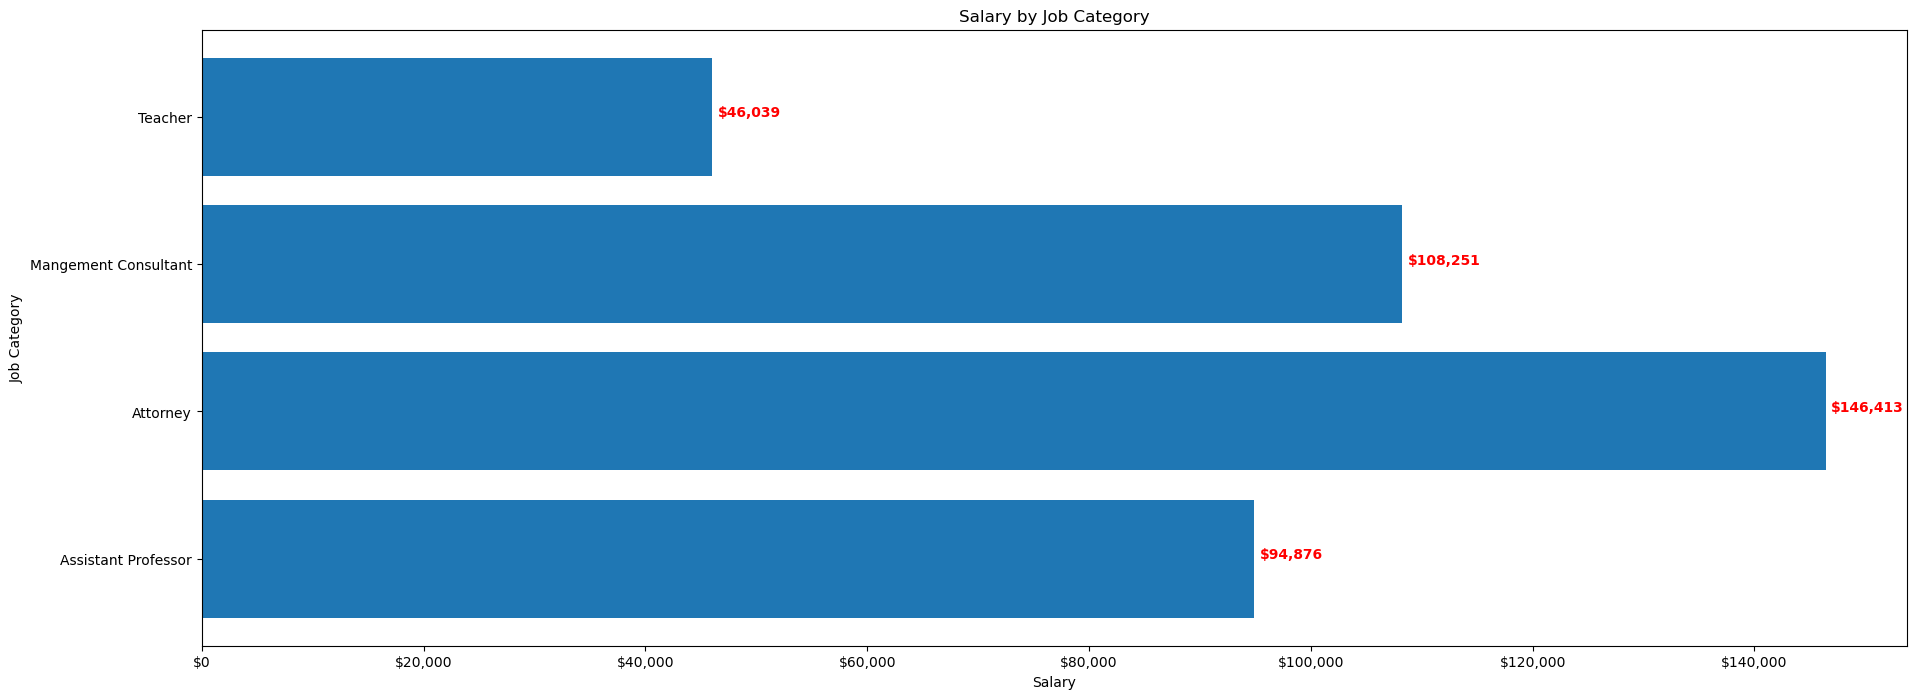

In [91]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

salaries = [94876, 146413, 108251, 46039]
jobs = ['Assistant Professor', 'Attorney', 'Mangement Consultant', 'Teacher']

fig, ax = plt.subplots(figsize=(22, 8))

ax.barh(jobs, salaries)

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

for i, v in enumerate(salaries):
    ax.text(v + 500, i, f'${v:,.0f}', color='red', fontweight='bold')

ax.set_xlabel('Salary')
ax.set_ylabel('Job Category')
ax.set_title('Salary by Job Category')

plt.show()

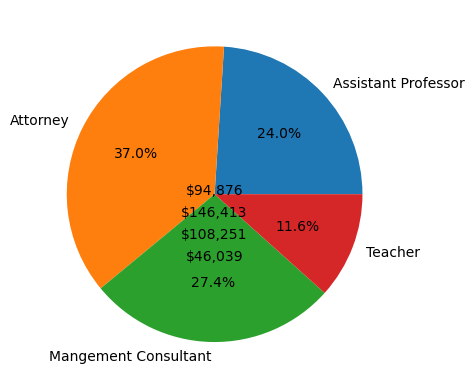

In [92]:
salaries = [94876, 146413, 108251, 46039]
positions = ['Assistant Professor', 'Attorney', 'Mangement Consultant', 'Teacher']

fig, ax = plt.subplots()
ax.pie(salaries, labels=positions, autopct='%1.1f%%')

for i, salary in enumerate(salaries):
    ax.text(0, 0-(i*0.15), f"${salary:,}", ha='center')

plt.show()